<a href="https://colab.research.google.com/github/irissun9602/DeepLearningProject/blob/master/1_4_4_%EC%98%81%ED%99%94%EC%B4%9D%EA%B4%80%EA%B0%9D%EC%88%98(%EB%94%A5%EB%9F%AC%EB%8B%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 데이터 로드

In [ ]:
#한글 폰트 설정하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,161 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
import numpy as np   #넘파이 라이브러리(수치관련)
import pandas as pd  #판다스 라이브러리(데이터분석)
import seaborn as sns #시각화 라이브러리
import matplotlib.pyplot as plt #시각화 라이브러리
import warnings
from IPython.display import set_matplotlib_formats

warnings.filterwarnings(action='ignore')
plt.style.use('seaborn')

plt.rc('font', family='NanumBarunGothic')
plt.rcParams["figure.figsize"] = (8, 5)
plt.rc("axes", unicode_minus=False)  #마이너스 표시 깨짐 방지
set_matplotlib_formats("retina")     #출력되는 글자 좀 더 선명하게


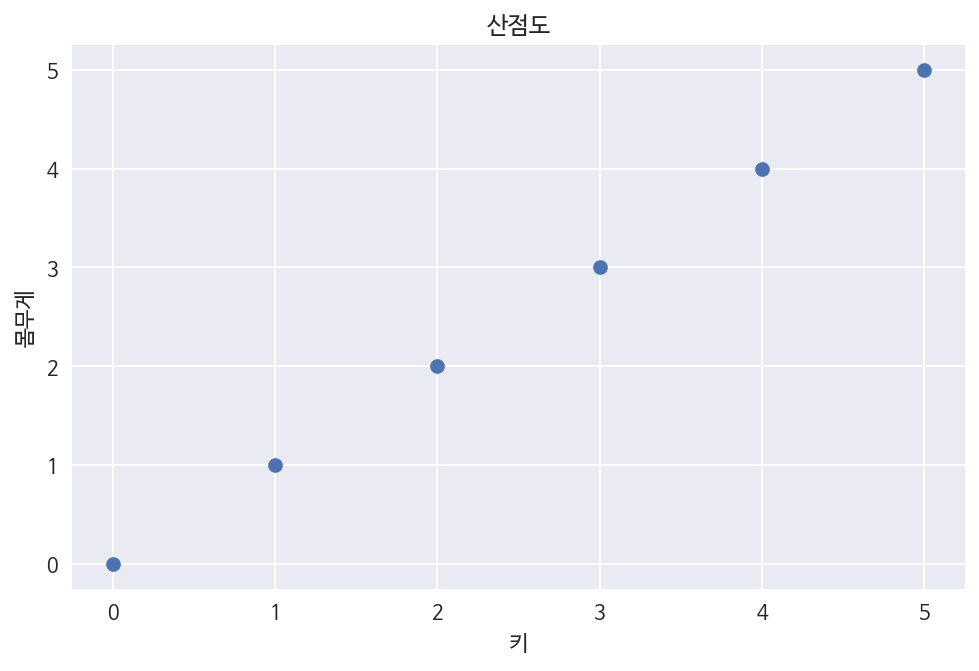

In [ ]:
# 한글 깨짐 테스트
plt.scatter([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])
plt.title('산점도')
plt.xlabel('키')
plt.ylabel('몸무게')
plt.show()

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
from google.colab import drive

# 엑셀 데이터 불러오기
drive.mount('./mount')
base_dir = './mount/My Drive/Colab Notebooks/AI_Programming_Movie/'
movie_data = pd.read_csv(base_dir+'without_outliers_rank.csv')
movie_data.head()

Drive already mounted at ./mount; to attempt to forcibly remount, call drive.mount("./mount", force_remount=True).


,Unnamed: 0,계절성여부,상영시간(분),스크린수,비평가 점수,관객 평가(네티즌평가),전체관람가,12세이상관람가,15세이상관람가,배우파워1,...,공연,성인물(에로),기타,다국적,배급사파워1,총관객수,success,actor_rank,actor_rank2,pd_rank
0,0,0,120,9,8.5,9.05,0,0,0,92105,...,0,0,0,0,1,18894,False,1684,2217,2296
1,1,0,130,11,7.0,8.99,0,0,1,362000,...,0,0,0,1,0,63040,False,2166,1903,2281
2,2,0,200,44,1.0,9.36,0,1,0,42,...,0,0,0,1,17,400353,False,867,1115,3099
3,3,0,110,6,1.0,3.05,0,0,1,2251491,...,0,0,0,0,0,3505,False,2854,2950,1473
4,4,0,104,21,1.0,6.46,0,0,1,393962,...,0,0,0,0,2,146740,False,2200,2216,2403


In [ ]:
movie_data['favor'] = movie_data['관객 평가(네티즌평가)'] - movie_data['비평가 점수']
movie_data['popular1'] = movie_data['pd_rank'] - movie_data['actor_rank']
movie_data['popular2'] = movie_data['pd_rank'] - movie_data['actor_rank2']
movie_data['production_rank'] = movie_data['배급사파워1'].rank(method='max')


In [ ]:
movie_data =movie_data.fillna(0)
movie_data.to_excel('without_outliers_rank.xlsx')

In [ ]:

movie_data.head()
movie_data.columns

Index(['Unnamed: 0', '계절성여부', '상영시간(분)', '스크린수', '비평가 점수', '관객 평가(네티즌평가)',
       '전체관람가', '12세이상관람가', '15세이상관람가', '배우파워1', '배우파워2', '감독파워', '다양성(독립)영화',
       '액션', '멜로/로맨스', '판타지', '드라마', '코미디', '어드벤처', '전쟁', '스릴러', '다큐멘터리',
       '공포(호러)', '애니메이션', '사극', 'SF', '범죄', '미스터리', '뮤지컬', '가족', '서부극(웨스턴)',
       '공연', '성인물(에로)', '기타', '다국적', '배급사파워1', '총관객수', 'success', 'actor_rank',
       'actor_rank2', 'pd_rank', 'favor', 'popular1', 'popular2',
       'production_rank'],
      dtype='object')

In [ ]:
# success 칼럼 예측하여 생성


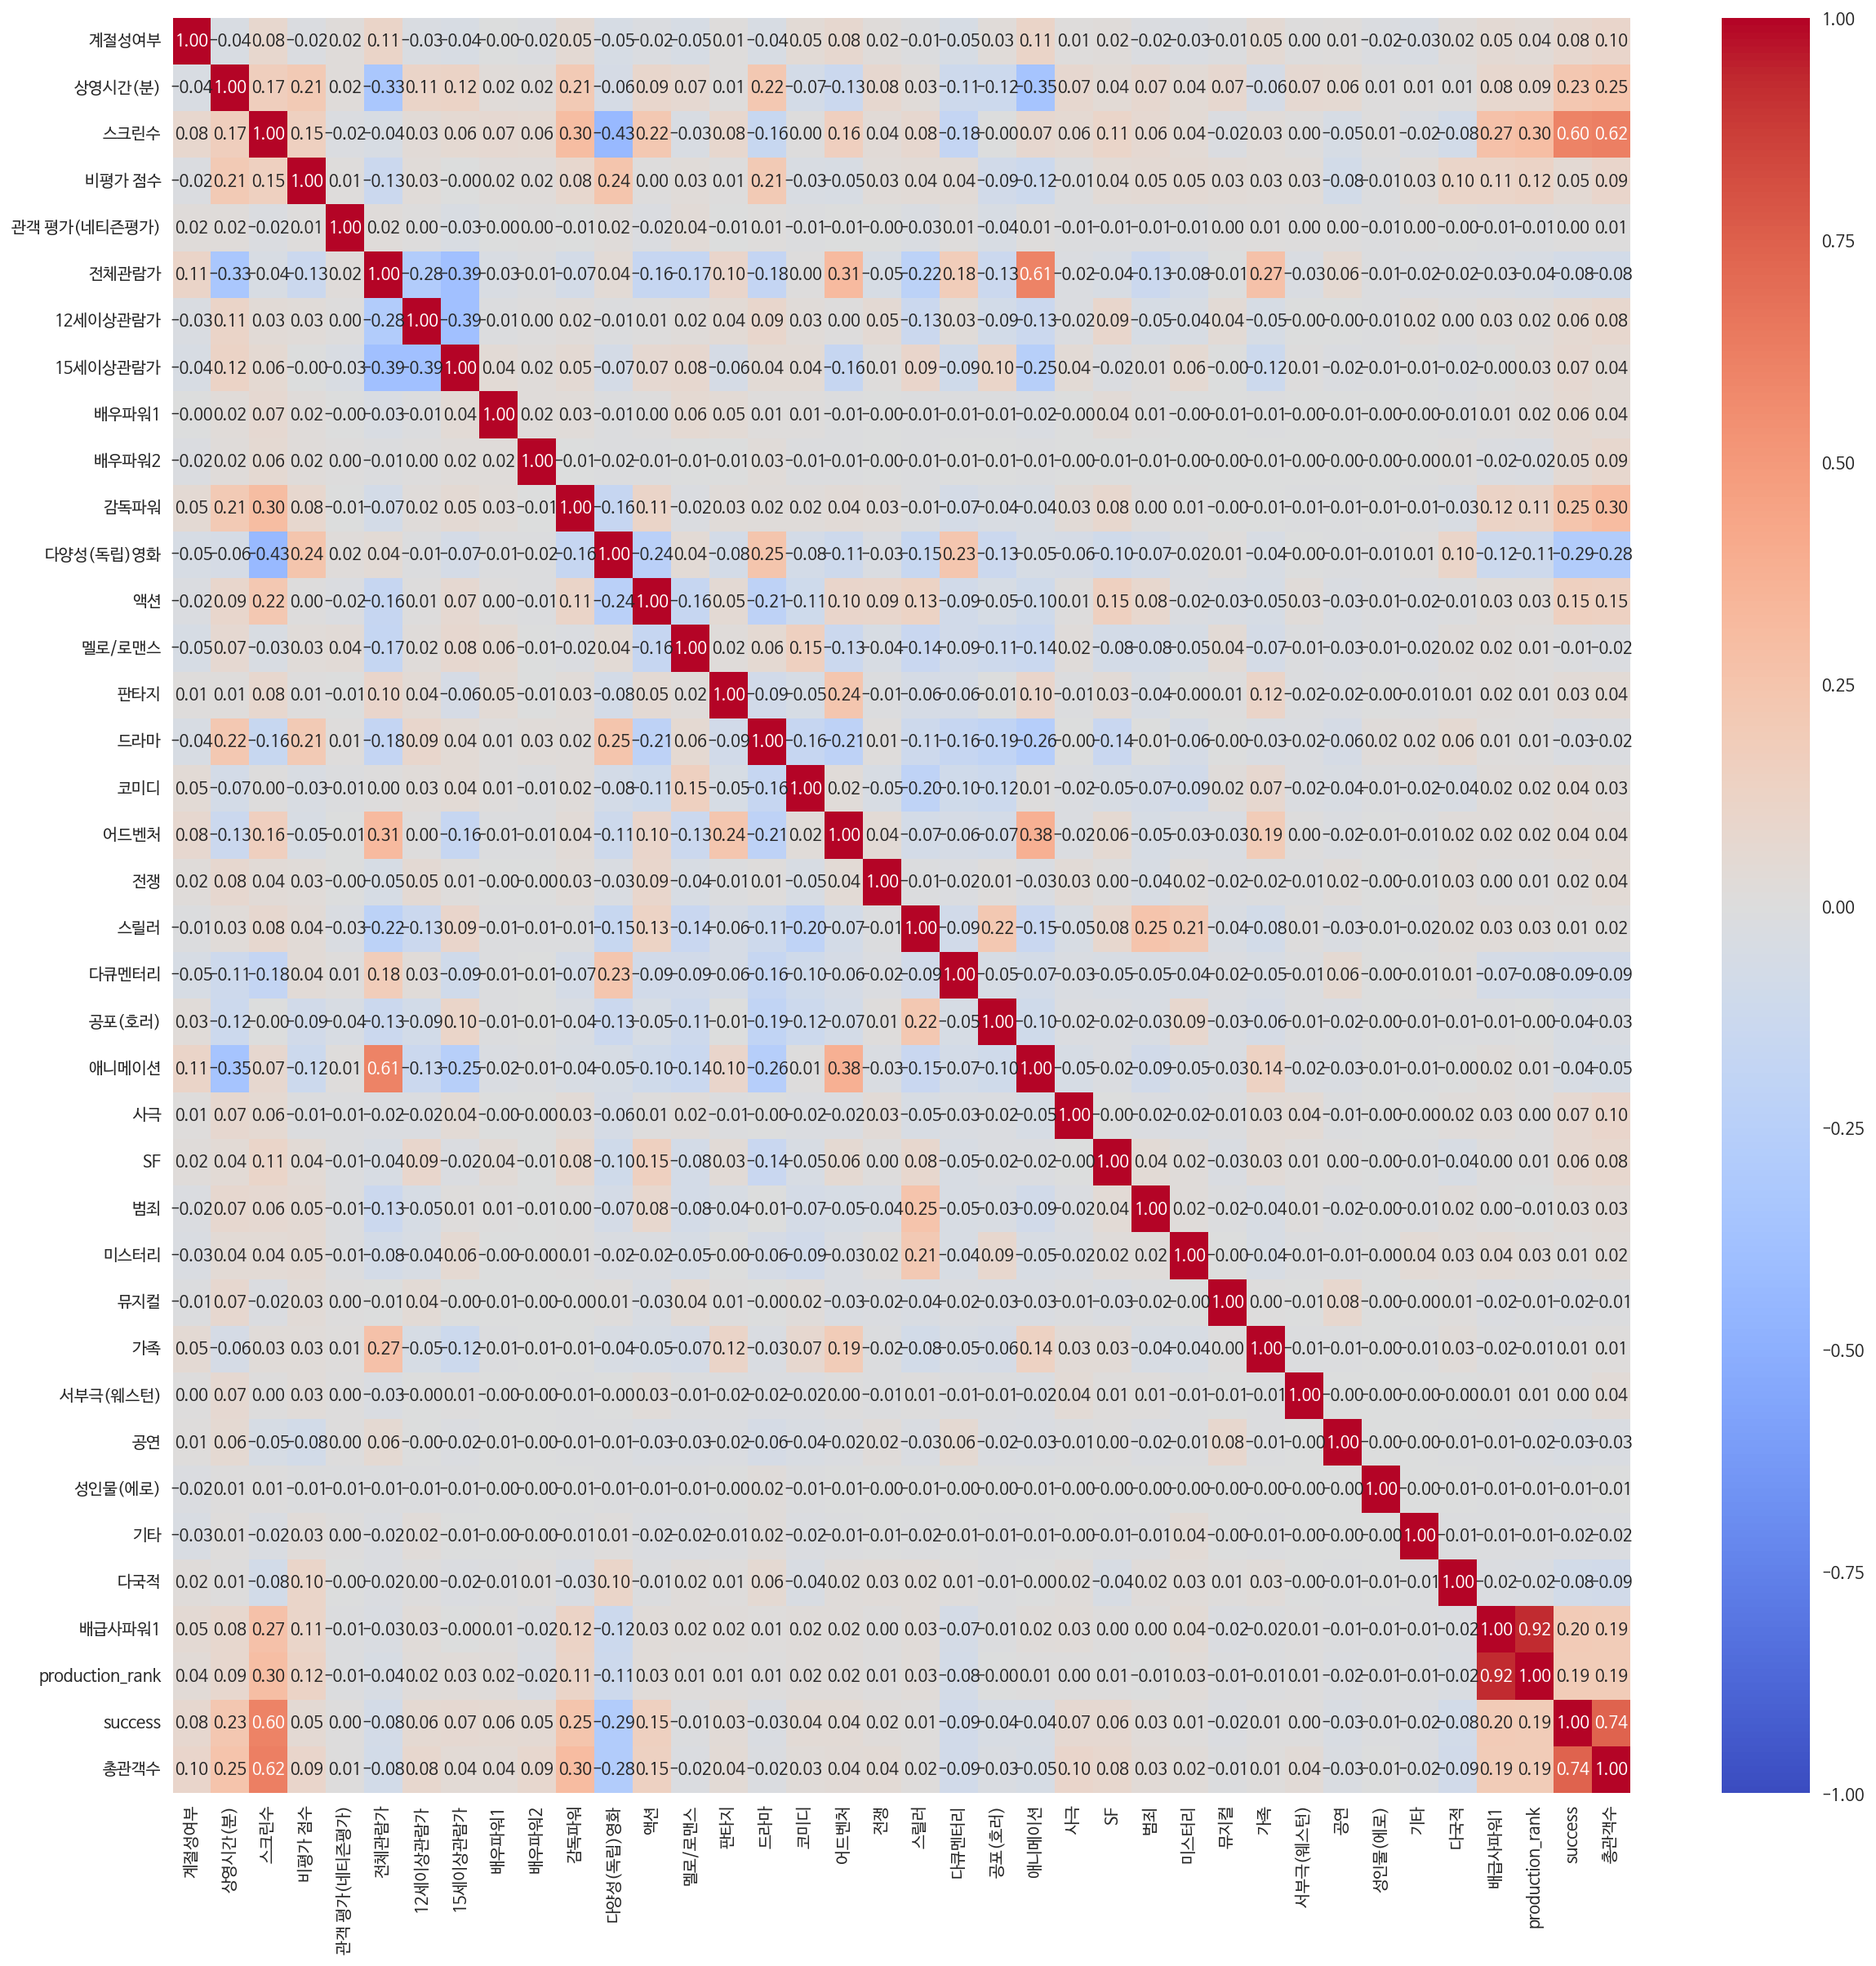

In [ ]:
import seaborn as sns #시각화 라이브러리
import matplotlib.pyplot as plt #시각화 라이브러리

plt.figure(figsize=(20,20))
heatmap_cols = ['계절성여부', '상영시간(분)', '스크린수', '비평가 점수', '관객 평가(네티즌평가)',
       '전체관람가', '12세이상관람가', '15세이상관람가', '배우파워1', '배우파워2', '감독파워', '다양성(독립)영화',
       '액션', '멜로/로맨스', '판타지', '드라마', '코미디', '어드벤처', '전쟁', '스릴러', '다큐멘터리',
       '공포(호러)', '애니메이션', '사극', 'SF', '범죄', '미스터리', '뮤지컬', '가족', '서부극(웨스턴)',
       '공연', '성인물(에로)', '기타', '다국적', '배급사파워1', 'production_rank', 'success', '총관객수']

sns.heatmap(movie_data[heatmap_cols].corr(), annot=True, vmin=-1, cmap='coolwarm', fmt = '.2f')

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams['axes.grid'] = True

def bar_chart(feature):
    success = movie_data[movie_data['success']==1][feature].value_counts()
    false = movie_data[movie_data['success']==0][feature].value_counts()
    df = pd.DataFrame([success, false])
    df.index = ['success','false']
    df.plot(kind='bar',stacked=True)

In [ ]:
bar_chart('배우파워1')

In [ ]:

y_target =  movie_data['총관객수']             #타겟값 저장
x_feature = movie_data.drop(['총관객수', 'success'], axis=1)  #타겟을 제외한 피쳐를 저장
print(x_feature)

      Unnamed: 0  계절성여부  상영시간(분)  스크린수  비평가 점수  관객 평가(네티즌평가)  전체관람가  12세이상관람가  \
0              0      0      120     9    8.50          9.05      0         0   
1              1      0      130    11    7.00          8.99      0         0   
2              2      0      200    44    1.00          9.36      0         1   
3              3      0      110     6    1.00          3.05      0         0   
4              4      0      104    21    1.00          6.46      0         0   
...          ...    ...      ...   ...     ...           ...    ...       ...   
3118        3118      1      113    84    8.00          8.93      0         0   
3119        3119      1      103   379    1.00          9.05      1         0   
3120        3120      1      109    98    6.25          7.93      0         0   
3121        3121      1       89   747    6.38          8.79      1         0   
3122        3122      1       88   200    1.00          9.03      0         1   

      15세이상관람가    배우파워1  ..

In [ ]:
from sklearn.model_selection import train_test_split

#데이터셋 분할, 타겟값을 균등하게 분할하기 위해 stratify= 옵션 사용
train_x, test_x, train_y, test_y = train_test_split(x_feature, y_target,
                                              random_state=35)

print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(2342, 43) (2342,)
(781, 43) (781,)


In [ ]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(train_x, train_y)

LinearRegression()

In [ ]:
predict_y = mlr.predict(test_x)

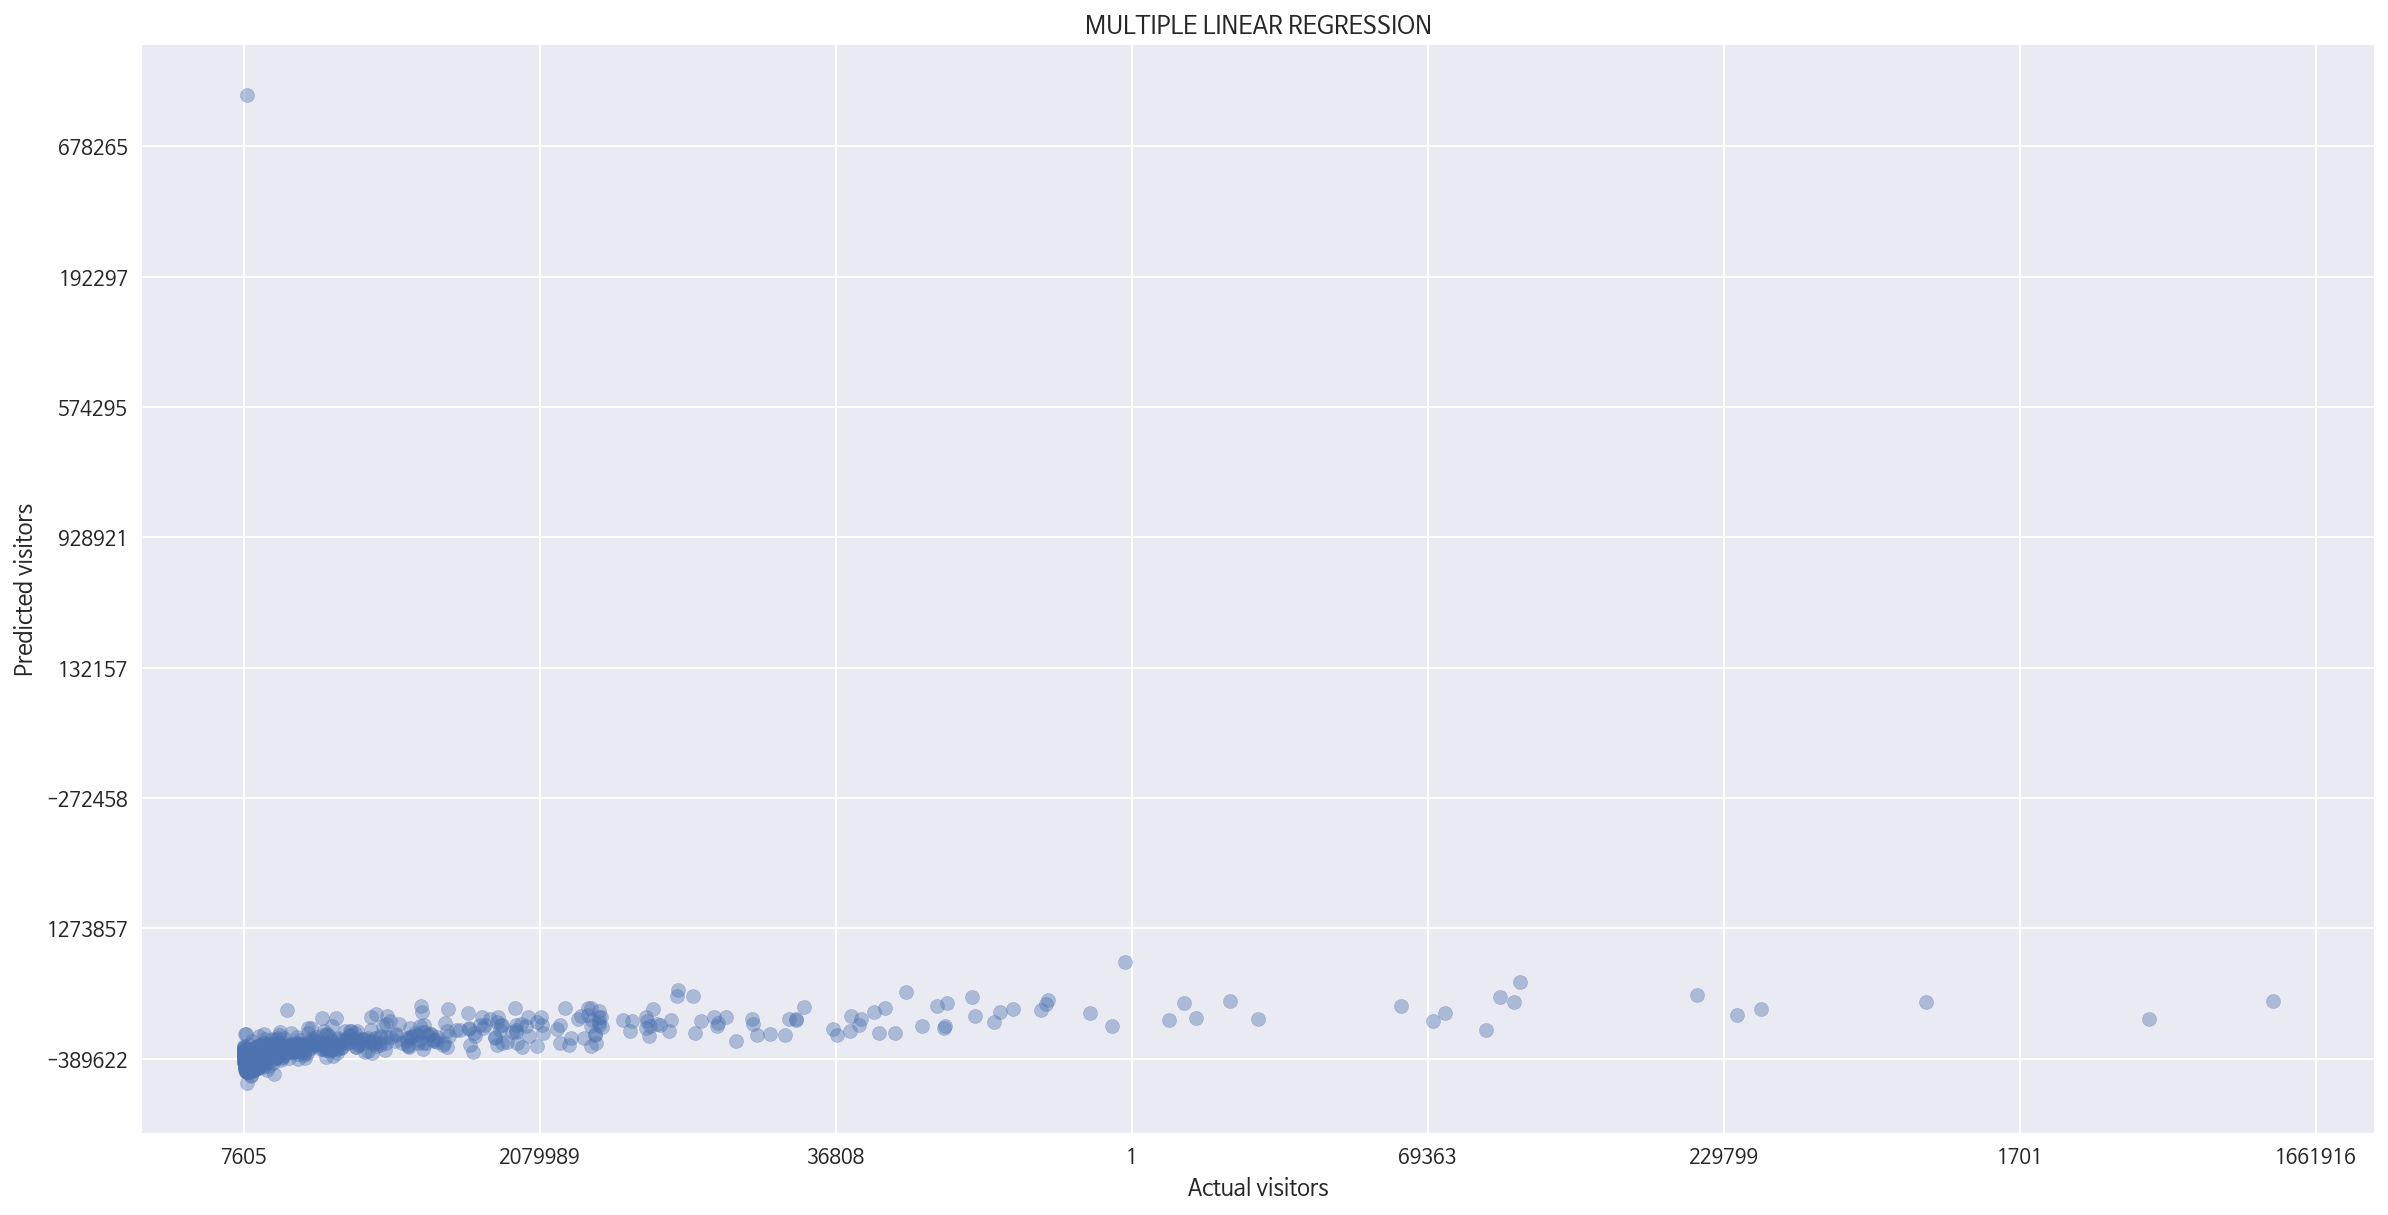

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(test_y, predict_y, alpha=0.4)
plt.xlabel("Actual visitors")
plt.ylabel("Predicted visitors")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in test_y])
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in predict_y])
plt.show()

In [ ]:
print(test_y)

test_y.nlargest(5, keep='first')




1944       5512
2258       7605
620     2079989
2479      36808
247           1
         ...   
1705      18857
122       18636
1657     106223
2604     185804
131       49640
Name: 총관객수, Length: 781, dtype: int64


689    6855300
313    6436508
489    5685441
435    5127003
847    5046096
Name: 총관객수, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

In [ ]:
params = {
    'n_estimators':(100, 200),
    'max_depth' : (5, 8),
    'min_samples_leaf' : (8, 18),
    'min_samples_split' : (8, 16)
}
rf_run = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_run, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(train_x, train_y)


print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 200}
최적 예측 정확도: 0.6678


In [ ]:
rf_run = RandomForestRegressor(random_state=0, max_depth=5, min_samples_leaf=8, min_samples_split=8,n_estimators=200)
rf_run.fit(train_x, train_y)


RandomForestRegressor(max_depth=5, min_samples_leaf=8, min_samples_split=8,
                      n_estimators=200, random_state=0)

In [ ]:
# train rmse
train_predict = rf_run.predict(train_x)
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict, train_y))) )

# validation rmse
valid_predict = rf_run.predict(test_x)
print("RMSE':{}".format(math.sqrt(mean_squared_error(valid_predict, test_y))) )


RMSE':416871.78907162003
RMSE':472311.6350124482


In [ ]:
from sklearn.metrics import r2_score

r2=r2_score(valid_predict, test_y)
r2

0.4565343716159368

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics  import mean_squared_error

lr_reg = LinearRegression()
#학습
lr_reg.fit(train_x,train_y)
#예측
pred = lr_reg.predict(test_x)

model_name = 'LinearRegression'
rmsle_val = calc_rmsle(test_y, pred)
print(f'RMSLE:: {rmsle_val:.3f}')
dic ={}
dic[model_name] = rmsle_val
dic

NameError: ignored

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state = 11, n_jobs=-1)
rfr.fit(train_x, train_y)
pred = rfr.predict(test_x)


model_name = 'RandomForest'
rmsle_val = calc_rmsle(test_y, pred)


dic[model_name] = rmsle_val
dic

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42, n_jobs = -1) #,objective='reg:squarederror')
xgb.fit(train_x, train_y)
pred = xgb.predict(test_x)

model_name = 'XGBoost'
rmsle_val = calc_rmsle(test_y, pred)
dic[model_name] = rmsle_val
dic

In [ ]:
from sklearn.metrics import r2_score

r2=r2_score(test_y, pred)
r2

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

Knn = KNeighborsRegressor()
Knn.fit(train_x, train_y)
pred = Knn.predict(test_x)

model_name = 'KNeighbors'
rmsle_val = calc_rmsle(test_y, pred)
dic[model_name] = rmsle_val
dic


In [ ]:
r2=r2_score(test_y, pred)
r2

prediction of [-0.1],[0.4]:[-0.08721007] 


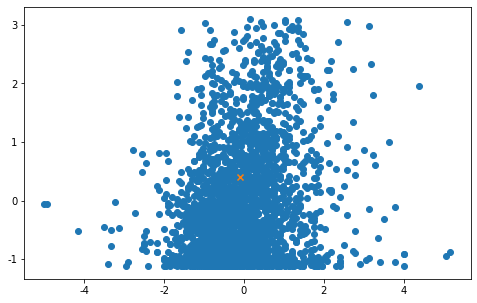

In [ ]:
import matplotlib.pyplot as plt

#새로운 데이터로 예측 score1:18, score2(550)
new_data = pd.DataFrame({'상영시간(분)':[-0.1], '스크린수':[0.4], '비평가 점수':[0.1],	'관객 평가(네티즌평가)':[0.1],	'감독파워':[-0.2], 'actor_rank':[-0.1]})

#예측
pred = Knn.predict(new_data)
print(f"prediction of {new_data['상영시간(분)'].values},{new_data['스크린수'].values}:{pred} ")
plt.figure(figsize=(8,5))
plt.scatter(train_x['상영시간(분)'], train_x['스크린수'])
plt.scatter(new_data['상영시간(분)'], new_data['스크린수'], marker='x')
plt.show()

In [ ]:
#KNeighborsClassifier는 주변에 가장 가까운 이웃을 찾아주는 알고리즘, default=5
#kneighbors()로 이웃까지의 거리와 이웃데이터의 인덱스를 구한다
dist, idxs = Knn.kneighbors(new_data)
print('distance :', dist)
print('indexes :', idxs)

idxs = idxs.flatten()  #2차원데이터를 1차원으로
print(idxs)


distance : [[0.35169914 0.43256131 0.43803139 0.48616628 0.50292263]]
indexes : [[1774 1654 1242 1562 1931]]
[1774 1654 1242 1562 1931]


In [ ]:
# 위에서 찾은 인덱스번째의 데이터를 찾기 위해 train_x 인덱스를 재설정한다
train_2 = train_x.reset_index()

# 칼럼 중에서 영화 상영 전에 확정할 수 있는 데이터를 기준으로 분석 칼럼을 선정하였다.

#train_2에서 인덱스가 idxs인 '상영시간(분)','스크린수'를 조회하세요
train_2.loc[train_2.index.isin(idxs),['상영시간(분)','스크린수']]

,상영시간(분),스크린수
1242,0.087936,0.589422
1562,0.143170,0.711904
1654,0.087936,0.216409
1774,-0.022532,0.600556
1931,-0.133001,0.021551


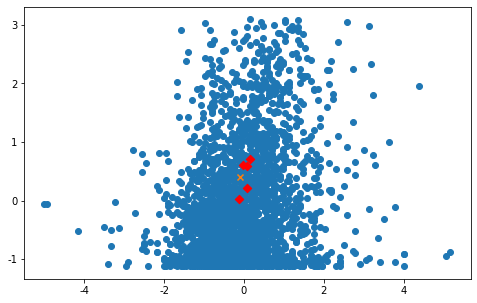

In [ ]:
#새로운 데이터 이웃에 있는 데이터분포를 확인한다
plt.figure(figsize=(8,5))

plt.scatter(train_x['상영시간(분)'], train_x['스크린수'])
plt.scatter(new_data['상영시간(분)'], new_data['스크린수'], marker='x')
plt.scatter(train_2.loc[train_2.index.isin(idxs),'상영시간(분)'],
            train_2.loc[train_2.index.isin(idxs),'스크린수'], marker='D', c='r')

In [ ]:
model_lasso = Lasso(alpha=0.5) # alpha => regularization strength

model_lasso.fit(train_x, train_y)
model_lasso.score(test_x, test_y) #R2

NameError: ignored

In [ ]:
model_ridge = Ridge(alpha=0.5) # alpha => regularization strength

model_ridge.fit(train_x, train_y)
model_ridge.score(train_x, train_y) #R2

0.4335588293318413

In [ ]:
model_elas = ElasticNet()
model_elas.fit(train_x, train_y)
model_ridge.score(train_x, train_y) #R2


0.4335588293318413

In [ ]:
# Cross validation 실시
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(model_elas, train_x, train_y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))


Mean MAE: 0.540 (0.032)
